# Tutorial: Using a custom filtration with pyper

This tutorial shows how to add attributes to a graph in order to define a filtration, and how this can be used to compute a persistence diagram with pyper.

In [8]:
import igraph as ig
import matplotlib.pyplot as plt
from pyper.persistent_homology import calculate_persistence_diagrams

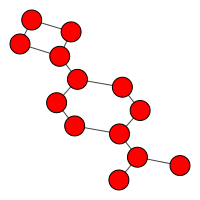

In [28]:
#Load a graph (in igraph format). Here, we just create one manually.

G = ig.Graph([(0,2),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,3),(6,9),(9,10),(10,11),(11,12),(12,9)])

layout = G.layout("kk")
ig.plot(G, layout = layout, bbox=(200,200))

We need to add attributes on vertices and edges to define the filtration.

When doing a sublevel filtration, we only consider vertices and edges whose attributes are below a threshold, and we progressively raise this threshold. Typically, we define a "height" on vertices, and we extend it to edges by setting the height of an edge to the maximum height of its two vertices. 

Below, we define a simple filtration for graphs based on the degree of the vertices: we set the height of each vertex $u$ to $\frac{\deg(u)}{\max_{v \in G} \deg(v)}$, and we extend it to edges by taking the maximum.

These attributes must be added to the graph as vertex and edge attributes, with a specific name (we chose 'f' here, but any other name would work, as long as it is not the name of an other attribute).

In [10]:
def calculate_degree_filtration(
    graph,
    attribute_out='f',
):
    """Calculate a degree-based filtration for a given graph.

    Parameters
    ----------
    graph:
        Input graph
    attribute_out:
        Specifies the attribute name for storing the result of the
        calculation. This name will pertain to *both* vertices and
        edges.
    Returns
    -------
    Copy of the input graph, with vertex weights and edge weights added
    as attributes `attribute_out`, respectively.
    """
    graph = ig.Graph.copy(graph)
    
    m = graph.maxdegree()
    
    graph.vs[attribute_out] = [d/m for d in graph.degree()]

    edge_weights = []
    for edge in graph.es:
        u, v = edge.source, edge.target
        p = graph.degree(u)/m
        q = graph.degree(v)/m
        edge_weights.append(max(p,q))
    graph.es[attribute_out] = edge_weights

    return graph

G = calculate_degree_filtration(G,attribute_out="f")

Once we have an attribute for the filtration, we can use pyper to compute the persistence diagram. We must specify the same name for 'vertex_attribute' and 'edge_attribute' as what we used above.

We get 2 persistence diagrams: one for dimension 0 (connected components) and one for dimension 1 (cycles). We can access the persistence tuples with pd_0._pairs and pd_1._pairs .

Persistence tuples for connected components:
[(0.6666666666666666, 0.6666666666666666), (0.6666666666666666, 0.6666666666666666), (0.6666666666666666, 0.6666666666666666), (0.6666666666666666, 0.6666666666666666), (1.0, 1.0), (0.3333333333333333, 1.0), (1.0, 1.0), (0.6666666666666666, 1.0), (1.0, 1.0), (0.6666666666666666, 1.0), (1.0, 1.0), (0.6666666666666666, 1.0), (0.3333333333333333, 1.0)]
Persistence tuples for cycles:
[(1.0, 1.0), (1.0, 1.0)]


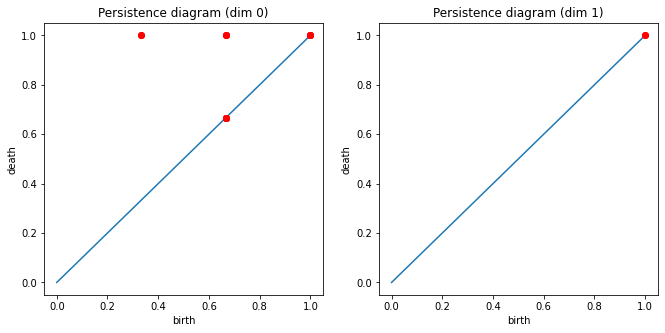

In [27]:
pd_0, pd_1 = calculate_persistence_diagrams(G,vertex_attribute='f', edge_attribute='f',order="sublevel")
print("Persistence tuples for connected components:")
print(pd_0._pairs)
print("Persistence tuples for cycles:")
print(pd_1._pairs)

fig,ax = plt.subplots(1,2,figsize=(11,5))
ax[0].plot([0,1],[0,1])
ax[0].plot(*zip(*pd_0._pairs),"ro")
ax[0].set_xlabel("birth")
ax[0].set_ylabel("death")
ax[0].set_title("Persistence diagram (dim 0)")
ax[1].plot([0,1],[0,1])
ax[1].plot(*zip(*pd_1._pairs),"ro")
ax[1].set_xlabel("birth")
ax[1].set_ylabel("death")
ax[1].set_title("Persistence diagram (dim 1)")
plt.show()